<a name="cell-solving"></a>

### 6.  [Iterative Methods](#cell-sovling-iterative)
1. [Gauss-Seidel](#cell-sovling-gauss-seidel)
    1. [Computation and Memory](#cell-sovling-Jacobi)
    2. [Convergence Properties](#cell-sovling-gauss-seidel-conv) 
    3. [Successive Overrelaxation](#cell-sovling-overrelaxation)
2. [Coordinate Descent](#cell-sovling-coordesent)
    1. [Gradients](#cell-sovling-gradients)
    2. [The quadratic function $\frac{1}{2}x^TAx - x^Tb + c$](#cell-sovling-coordesent-quad)
    3. [Nonlinear Gauss-Seidel](#cell-opt-fx-gauss-seidel)
3. [Line Search](#cell-opt-fx-linesearch)
    1. [Polynomial Approximation, Ternary (~~Bi~~Trisection) Search, and Backtracking](#cell-opt-fx-poly)
    2. [Golden Section Search](#cell-opt-fx-golden)
    3. [Goldstein-Armijo Sufficient Decrease, Curvature Conditions](#cell-opt-fx-Goldstein-Armijo)
4. [Gradient (Steepest Direction) Descent](#cell-sovling-gradients-steepest)        
    1. [Automatic Differentiation](#cell-sovling-gradients-auto): Week 4 Programming Assigment Problem 2
    2. [When can Gradient Descent work perfectly?](#cell-sovling-gdall)
    3. [Conjugate Gradient Methods](#cell-sovling-conjugate)
    

<a name="cell-sovling-iterative"></a>

# 6 Iterative Methods ([Return to TOC](#cell-solving))

---

- Solving for $\hat \beta$ such that $X_{n\times m}\hat \beta \approx y$ with $O(m^3)$ ***QR decomposition*** or $O(m^3)$ ***SVD*** is 
    - ~7-9 times slower than solving $X^T\!X\hat \beta = X^Ty$ with either $O(m^3)$ ***Gaussian elimination*** or $O(m^3)$ ***Cholesky decomposition*** followed by $O(m^2)$ ***backward substitution***
    - ~10-15 times slower than just the prerequesite $O(nm^2)\; n>m$  ***gramian*** computation $X^T\!X$ alone

Given $X^T\!X$ however $O(sm^2)$ ***iterative methods*** based on $s<m$ can replace the $O(m^3)$ ***direct methods*** above

$\Longrightarrow$ There is generally a natural computational tradeoff in ***iterative methods*** between

1. the number of steps taken in order to converge sufficiently close to the answer, and
2. how useful each step is (which will generally be a function of computational expense)

$\Longrightarrow$ When using ***iterative methods***, care must be taken to choose a good ***stopping criterion***, e.g.,

$$\Delta(\hat \beta^{(k)}, \hat \beta^{(k+1)}) < \epsilon \quad \text{ or } \quad
\Delta(\hat \beta^{(k)}, \hat \beta^{(k+1)}) < \epsilon |\hat \beta^{(k)}| 
\quad \text{to limiting } k < m$$

$\Longrightarrow$ It is also important to recognize that starting values $\hat \beta^{(0)}$ are generally very crucial for ***iterative methods***


<a name="cell-sovling-gauss-seidel"></a>
## 6.1 Gauss-Seidel ([Return to TOC](#cell-solving))
---

The $O(sn^2)$ ***Gauss-Seidel*** method  utilizes an ***additive*** (rather than ***multiplicative***) ***factorization***

\begin{align*}
X^T\!X \hat \beta = {} & X^T \! y \\ \hline
A_{n \times n}x = {} & b \quad \text{$A = (L + D + U)$ decomposition costs nothing} \\
(L + D + U)x = {} & b \quad \text{$D$ diagonal $L$ and $U$ zero diagonal upper and lower triangular} \\ \hline
(L+D)x^{(k+1)} = {} & b -  Ux^{(k)} \\
x^{(k+1)} = {} & (D+L)^{-1}b - (D+L)^{-1}Ux^{(k)} = v + Cx^{(k)}\\
\text{or just } \quad Dx^{(k+1)} = {} & b - Lx^{(k+1)} - Ux^{(k)} 
\end{align*}

which suggests a sequence of updates which (hopefully) iteratively improve a true solution approximation

\begin{align*}x^{(1)}_1 = {} & \frac{1}{a_{11}}\left( b_1  - \sum_{j=2}^{n} a_{1j}x_{j}^{(0)} \right) \quad 
\text{initial value $x^{(0)}$} \\
  x^{(k+1)}_i = {} & \frac{1}{a_{ii}}\left( b_i - \sum_{j=1}^{i-1} a_{ij}x_j^{(k+1)} - \sum_{j=i+1}^{n} a_{ij}x_j^{(k)} \right)\end{align*}


<a name="cell-sovling-Jacobi"></a>
### 6.1.A Computation and Memory ([Return to TOC](#cell-solving))

---

A single step of ***Gauss-Seidel*** is $O(n^2)$ 
- each $x_i^{(k+1)}$ update for $i = 1, ..., n$ 
    - entails $n$ multiplication-division operations plus $n$ addition-subtraction operations
- but if $A$ is relatively ***sparse*** with many $0$'s this becomes $O(n n')$ with $n<n'$

For $s<n$ then, $O(snn')$ ***Gauss-Seidel*** can be substantially more efficient than $O(n^3)$ ***Gaussian elimination***, especially if $n$ is large

<!-- > - For some extended considerations about ***sparsity*** please see Keith Knight's STA410 [notes2.pdf](https://q.utoronto.ca/courses/296804/files?preview=24222609) document beginning on page 2.-->


Updating $x^{(k+1)}$ only based on the elements of $x^{(k)}$ is called the ***Jacobi algorithm***

$$x^{(k+1)}_i = \frac{1}{a_{ii}}\left( b_i - \sum_{j=1}^{i-1} a_{ij}x_j^{\overset{\color{red}{\text{or }(k)}}{(k+1)}} - \sum_{j=i+1}^{n} a_{ij}x_j^{(k)} \right)$$

but requires both $x^{(k)}$ and $x^{(k+1)}$ be stored in memory; whereas, 
the ***Gauss-Seidel algorithm*** can be done "in-place" 


<a name="cell-sovling-gauss-seidel-conv"></a>

### 6.1.B Convergence Properties ([Return to TOC](#cell-solving))
---

$\Delta(b-Ax^{(k)}, b-Ax^{(k+1)})$ monitors convergence; and ***Gauss-Seidel*** will converge if any of the following hold:

- the ***spectral radius*** (largest ***eigenvalue***) $\quad \rho\left((L + D)^{-1}U\right)<1 \quad$ and converges faster when smaller

    - which is proven based on convergence properties of the ***matrix power series*** $\sum_{k=0}^{\infty}C^k = (I - C)^{-1}$

- $A$ is ***strictly diagonally dominant*** with $\quad |a_{ii}| > \sum_{i \neq j} |a_{ij}| \; \text{ for all } i$
    - which is proven based on invertibiltiy of ***strictly diagonally dominant matrices***

- $A$ is ***symmetric***, $A$ and $D$ are ***positive definite***, and $D-L-U = D - L - L^T$ is ***positive definite***.

    - which is proven based on ***eigenvalues*** of $C= - (L + D)^{-1} U = - (L + D)^{-1}(D + L - A )$ 

> See Keith Knight's STA410 [class notes8.pdf](https://q.utoronto.ca/courses/296804/files?preview=24301082) document beginning on page 15 for convergence proofs (and the ***Gauss-Seidel*** and ***Jacobi*** algorithms themselves are introduced beginning on page 10)



<a name="cell-sovling-overrelaxation"></a>

### 6.1.C Successive Overrelaxation ([Return to TOC](#cell-solving))
---

***Successive overrelaxation*** updates are a weighted average of current $x_i^{(k)}$ and the iterative update

***Successive overrelaxation*** for ***Gauss-Seidel***  

$$x_i^{(k+1)} = \overbrace{\underset{\text{last answer $x_i^{(k)}$}}{\underbrace{(1-\omega)x_i^{(k)}}_{\text{weighted with}}} + \omega}^{\text{if $\omega=1$ this goes away}}\underbrace{\frac{1}{a_{ii}}\left( b_i - \sum_{j=1}^{i-1} a_{ij}x_j^{(k+1)} - \sum_{j=i+1}^{n} a_{ij}x_j^{(k)} \right)}_{\text{and we're just left solving the Gauss-Seidel equations}}$$

generally has faster algorithmic convergence than vanilla ***Gauss-Seidel*** as a result of reducing the ***spectral radius*** 

$$\rho\left((\omega L + \omega D)^{-1}\omega U\right)<\rho\left((L + D)^{-1}U\right)<1$$

which follows from the analytical ***successive overrelaxation Gauss-Seidel*** form

$$\scriptsize\begin{align*}
Ax = (L + D + U )x = {} &  b \\ 
\omega Lx + (\omega - 1 + 1) D x = {} & \omega (b -  Ux) \\
\omega Lx +  D x = {} & (1-\omega) Dx + \omega (b -  Ux) \\ \hline
(\omega L +  D) x^{(k+1)} = {} & (1-\omega) Dx^{(k)} + \omega (b -  Ux^{(k)}) \\ 
 D x^{(k+1)} = {} & (1- \omega)Dx^{(k)} + \omega( b -  Lx^{(k+1)} -  Ux^{(k)})  
\end{align*}$$

In [5]:
import numpy as np; import matplotlib.pyplot as plt

# Gauss-Seidel vs Overrelaxation
n = 100; A1_0 = np.diag(np.ones(n)) + 1.0; A0_1 = np.diag(np.ones(n)) + 0.2; 
A0_1cond = np.round(np.linalg.cond(A0_1),2); A1_0cond = np.round(np.linalg.cond(A1_0),2)

x_true = np.ones((n,1)); b1_0 = A1_0.dot(x_true); b0_1 = A0_1.dot(x_true)
x1_0_current_GS = x_true+0.1; x1_0_current_GS_OR = x_true+0.1; x0_1_current_GS = x_true+0.1; x0_1_current_GS_OR = x_true+0.1

L1_0,D1_0,U1_0 = A1_0.copy(),np.diag(np.diag(A1_0)),A1_0.copy()
# https://numpy.org/doc/stable/reference/generated/numpy.tril_indices.html
L1_0[np.triu_indices(n)] = 0; U1_0[np.tril_indices(n)] = 0
L0_1,D0_1,U0_1 = A0_1.copy(),np.diag(np.diag(A0_1)),A0_1.copy()
L0_1[np.triu_indices(n)] = 0; U0_1[np.tril_indices(n)] = 0

gauss_seidel_trajectory0_1 = np.zeros(int(n/2))
gauss_seidel_trajectory1_0 = np.zeros(int(n/2))
gauss_seidel_overrelaxation_trajectory0_1 = np.zeros(int(n/2))
gauss_seidel_overrelaxation_trajectory1_0 = np.zeros(int(n/2))
for i in range(int(n/2)):

  # Gauss-Seidel

  x0_1_current_GS = np.linalg.solve(L0_1+D0_1, b0_1 - U0_1.dot(x0_1_current_GS))
  delta0_1_GS = x_true - x0_1_current_GS
  gauss_seidel_trajectory0_1[i] = delta0_1_GS.T.dot(delta0_1_GS)**0.5

  x1_0_current_GS = np.linalg.solve(L1_0+D1_0, b1_0 - U1_0.dot(x1_0_current_GS))
  delta1_0_GS = x_true - x1_0_current_GS
  gauss_seidel_trajectory1_0[i] = delta1_0_GS.T.dot(delta1_0_GS)**0.5

  # Successive Overrelaxation 
  omega=0.5

  x0_1_current_GS_OR = np.linalg.solve(omega*L0_1+D0_1,
    (1-omega)*D0_1.dot(x0_1_current_GS_OR) + omega*(b0_1 - U0_1.dot(x0_1_current_GS_OR)))
  delta0_1_GS_OR = x_true - x0_1_current_GS_OR
  gauss_seidel_overrelaxation_trajectory0_1[i] = delta0_1_GS_OR.T.dot(delta0_1_GS_OR)**0.5

  x1_0_current_GS_OR = np.linalg.solve(omega*L1_0+D1_0,
    (1-omega)*D1_0.dot(x1_0_current_GS_OR) + omega*(b1_0 - U1_0.dot(x1_0_current_GS_OR)))
  delta1_0_GS_OR = x_true - x1_0_current_GS_OR
  gauss_seidel_overrelaxation_trajectory1_0[i] = delta1_0_GS_OR.T.dot(delta1_0_GS_OR)**0.5

/var/folders/sd/hnfh4zsn34d7xpbz9226pz200000gn/T/ipykernel_45513/1998370161.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gauss_seidel_trajectory0_1[i] = delta0_1_GS.T.dot(delta0_1_GS)**0.5
/var/folders/sd/hnfh4zsn34d7xpbz9226pz200000gn/T/ipykernel_45513/1998370161.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gauss_seidel_trajectory1_0[i] = delta1_0_GS.T.dot(delta1_0_GS)**0.5
/var/folders/sd/hnfh4zsn34d7xpbz9226pz200000gn/T/ipykernel_45513/1998370161.py:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before 

### 6.1.C Successive Overrelaxation 
---


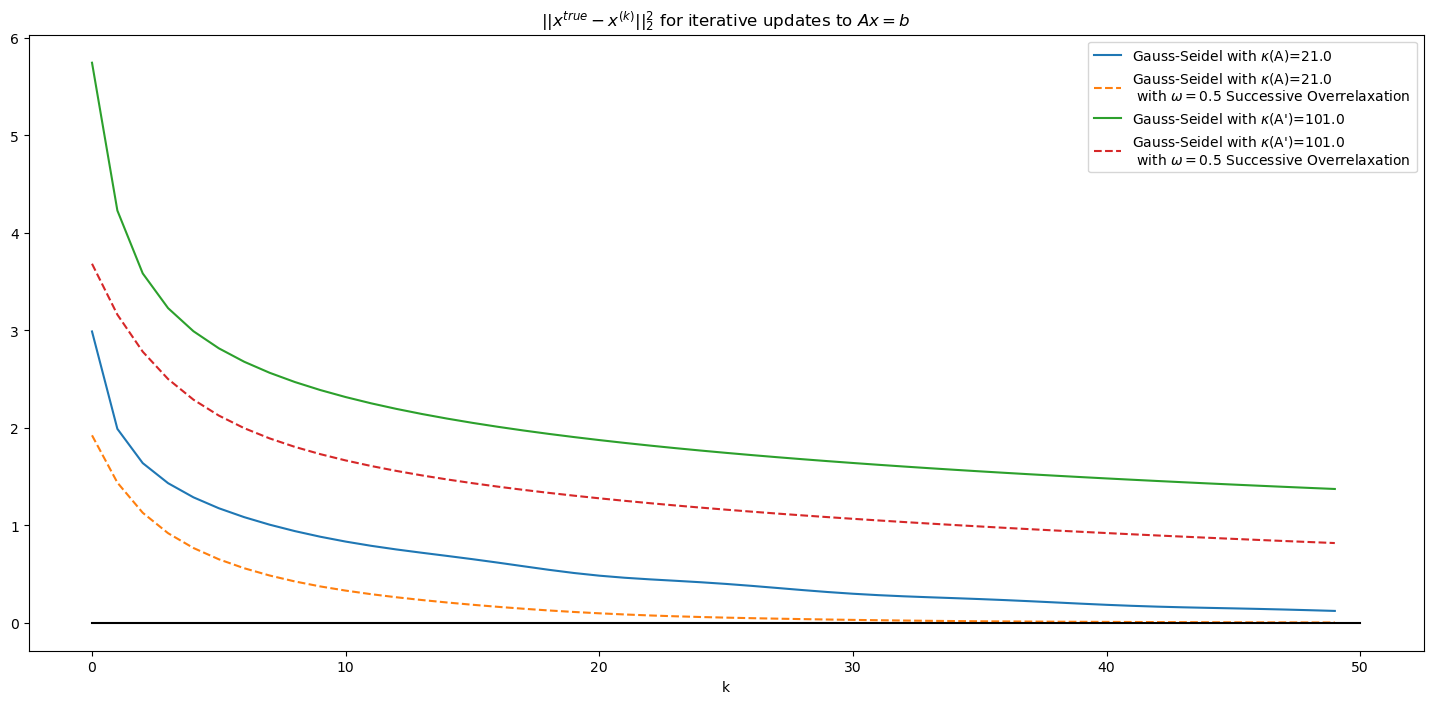

In [7]:
plt.figure(figsize=(18,8)); plt.plot(gauss_seidel_trajectory0_1, label="Gauss-Seidel with $\\kappa$(A)="+str(A0_1cond)); plt.plot(gauss_seidel_overrelaxation_trajectory0_1, label="Gauss-Seidel with $\\kappa$(A)="+str(A0_1cond)+"\n with $\\omega=$" + str(omega) + " Successive Overrelaxation", linestyle='--'); plt.plot(gauss_seidel_trajectory1_0, label="Gauss-Seidel with $\\kappa$(A')="+str(A1_0cond)); plt.plot(gauss_seidel_overrelaxation_trajectory1_0, label="Gauss-Seidel with $\\kappa$(A')="+str(A1_0cond)+"\n with $\\omega=$" + str(omega) + " Successive Overrelaxation", linestyle='--'); plt.plot([0,n/2],2*[0],'k-'); plt.title("$||x^{true}-x^{(k)}||_2^2$ for iterative updates to $Ax = b$"); plt.xlabel("k"); plt.legend();

<a name="cell-sovling-coordesent"></a>

## 6.2 Coordinate Descent ([Return to TOC](#cell-solving))

--- 

***Coordinate descent*** is a general ***iterative method*** for solving systems of equations<br>by optimizing one variable $x_j$ at a time, repeatedly cycling through the elements of $x^{(k)}$ until stabilization

Solving $Ax=b$ for ***symmetric positive definite*** $A$ is eqivalent to minimizing the corresponding quadratic form

$$\frac{1}{2} x^TAx - x^Tb + c = \frac{1}{2}\sum_i\sum_j a_{ij}x_i x_j + \sum_i b_i x_i + c$$

$$\begin{align*}
\frac{\partial}{\partial x_i }x^TAx - x^Tb + c = {} & a_{ii}x_i + b_i + \sum_{j \not = i} a_{ij}x_j \; \overset{\text{set to}}{= 0}\\
\Longrightarrow \quad x_i =  {} &\frac{1}{a_{ii}}\left(b_i + \sum_{j \not = i} a_{ij}x_j\right)
\end{align*}$$

so ***Gauss-Seidel*** solving $Ax=b$ is actually a ***coordinate descent*** algorithm doing ***quadratic function optimization***  



<a name="cell-sovling-gradients"></a>

### 6.2.A Gradients ([Return to TOC](#cell-solving))

--- 

The ***operator*** (i.e., function returning a function) $\nabla_{x}$ is called the ***gradient*** and generalizes the ***derivative for scalar quantities*** as the vector collection of all the ***partial derivatives*** of its argument, the ***scalar valued multivariate function*** $f_x$, with respect to input elements $x_i$ of $f_x$

$$ \nabla_{x}(f_x) = \frac{\partial f_x}{\partial x_1} e_1 + \cdots + \frac{\partial f_x}{\partial x_i} e_i + \cdots + \frac{\partial f_x}{\partial x_n} e_n $$

for ***standard basis vectors*** $e_i$.

Like the ***derivative***, the ***gradient*** is a ***linear operator*** with 
 
$$\nabla_{x}(af_x+bg_x) = a\nabla_{x}(f_x) + b\nabla_{x}(g_x)$$

and (as seen above) has the simple rules such as

$$\nabla_{x} x^Tb = b \quad \text{ and } \quad \nabla_{x} x^TAx = 2Ax$$

<a name="cell-sovling-coordesent-quad"></a>

### 6.2.B The quadratic function $\frac{1}{2}x^TAx - x^Tb + c$ ([Return to TOC](#cell-solving))

--- 

All of the following solve $Ax = b$ for ***symmetric positive definite*** $A$ (such as $X^T\!X \hat \beta = X^T \! y$ for ***full rank*** $X$) 

- $\underset{x}{\text{argmin}} ||b - Ax||_2^2$
- $\underset{x}{\text{argmin}} ||b - Ax||_2^{A^{-1}} = ||\underbrace{(b - Ax)^T A^{-1} (b - Ax)}_{1 \times 1}||_2 \quad \text{the }\textbf{elliptical norm}$
- $\underset{x}{\text{argmin}} \frac{1}{2}x^TAx - x^Tb + c$ 

\begin{align*}
\text{since } \quad \nabla_{x} \left[ (b - Ax)^T A^{-1} (b - Ax) \right]= {} & 
\underbrace{\nabla_{x} \left[ x^TAx - 2b^Tx + b^TA^{-1}b \right]}_{\text{gradients have scalar-like derivative rules}\quad\quad\quad\quad\quad}\\
0 = {} & \overbrace{- 2b^T + 2(x)^TA}\\
 = {} & -\underset{A \text{ is symmetric}}{(b - Ax)} \quad \Longrightarrow Ax = b
\end{align*}

- And the ***positive definite*** character of $A$ means that $||b - Ax||_2^2$ and $||b - Ax||_2^{A^{-1}}$ and the quadratic function $\frac{1}{2}x^TAx - x^Tb + c$ are all  ***convex*** and therefore have a (unique shared) ***global minimum***

<a name="cell-opt-fx-gauss-seidel"></a>

### 6.2.C Nonlinear Gauss-Seidel ([Return to TOC](#cell-solving))

---

***Coordinate descent*** minimizes the ***nonlinear*** function $\frac{1}{2} x^TAx - x^Tb + c$ with the update 

$$x_i^{(k+1)} = g(A_{i,\cdot},b_i,x_{-i}^{(k)}) = \frac{1}{a_{ii}}\left(b_i + \sum_{j \not = i} a_{ij}x_j^{(k)}\right)$$

which (while eqivalent to ***Gauss-Seidel***) was derived as an optimization problem

- ***Coordinate descent*** coudl thus be applied to any (not necessarily a quadratic) function using, e.g., `optimize.minimize_scalar(univariate_f, method='brent').x`.

***Nonlinear Gauss-Seidel*** solves for $x$ for any ***nonlinear*** $\nabla_x f(x)=0$ equation by iteratively solving for $x_{i}^{(k+1)}$ via

$$0 = \frac{\partial}{\partial x_{i}}f(x^{(k+1)}_i,\cdots, x_{i-1}^{(k+1)}, x_{i}^{(k+1)}, x_{i+1}^{(k)},\cdots, x_{p}^{(k)})$$


- The update function $x_{i}^{(k+1)}\!=g(x_{-i}^{(k)})$ resulting from the partial optimization problem above is arbitrary; so, e.g., $g$ could itself be an ***iterative method*** such as some limited number of steps of the ***bisection*** method 

In [8]:
n, lim = 50, 50
x1, x2 = np.meshgrid(np.linspace(-lim,lim,n), np.linspace(-lim,lim,n))
X = np.concatenate([x1.reshape(n**2, 1), x2.reshape(n**2, 1)], axis=1)
A, b, c = np.eye(2)+2, np.ones((2,1)), 1
y = (X.dot(A)*X - X.dot(b)+ c).sum(axis=1).reshape(n,n)

# Assumes A, b, and c
def build_univariate_f(x_, i):
  # https://www.saltycrane.com/blog/2010/03/simple-python-decorator-examples/
  @np.vectorize  # same as `np.vecorize(f)` if `f` is defined
  # so that f works if y is a numpy.array instead of a scalar
  def f(y):
    if i:
      x = np.array([x_, y])
    else:
      x = np.array([y, x_])
    return x.dot(A).dot(x) - x.dot(b) + c
  return f

### 6.2.C Nonlinear Gauss-Seidel

---

This demonstrates that ***nonlinear Gauss-Seidel*** can be applied as a ***coordinate descent*** solving for $f(x) = b$ for an arbitrary function `univariate_f` on the basis of a preferred univariate optimization method

- The relative simplicity and well-behaved nature of solving the above equation for ***nonlinear*** $f$ on the basis of cyclical iteration of univariate problems makes for a particuarly well-performing method


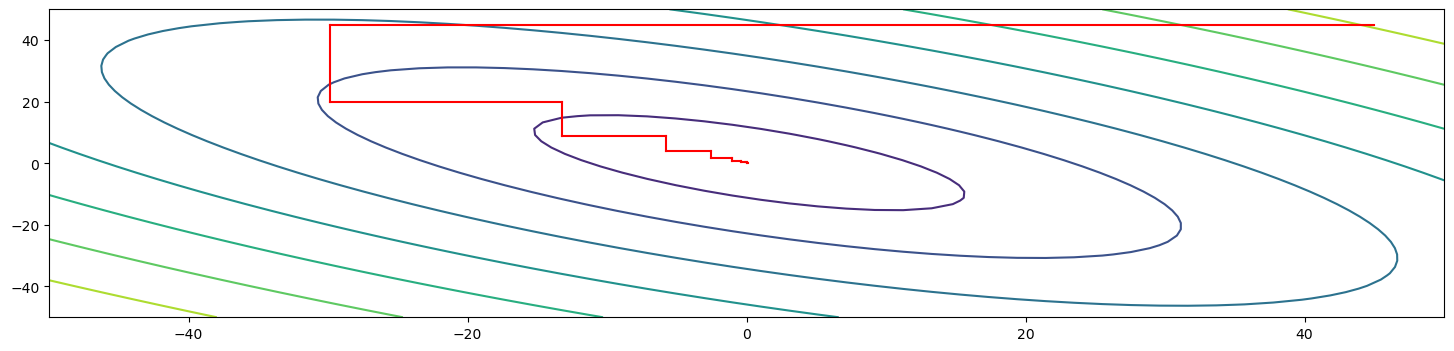

In [24]:
from scipy import optimize # https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html
s,x0 = 20,45.0*np.ones((2,1)); fig,ax = plt.subplots(figsize=(18,4)); ax.contour(x1, x2, np.sqrt(y)) # ax.set(aspect=1) # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html#examples-using-matplotlib-pyplot-figure
for k in range(s):
  for i in range(2):
    xk = x0.copy(); univariate_f = build_univariate_f(x0[1-i][0], i)
    # we'll just use this numerical method rather than the analytical derivation
    xi = optimize.minimize_scalar(univariate_f, method='brent').x
    xk[i] = xi; plt.plot([x0[0],xk[0]], [x0[1],xk[1]], 'r')  
    x0 = xk.copy()


> ***Nonsquare Gauss-Seidel?***
> 
> - As presented, ***Gauss-Seidel*** is for ***square*** problems where the number of parameters $x$ and the number of outcomes $b$ have the same dimension.  This presumption is also implicit in the specification of ***Nonlinear Gauss-Seidel***. But could this work for ***nonsquare***  $A_{n\times p} x_{p \times 1} = b_{n \times 1}$ or $f(x_{p \times 1})=b_{n \times 1}$ problems? 
> 
> There are some [relatively recent results](https://arxiv.org/pdf/1706.07640.pdf) regarding convergence of the cyclically iterative strategy in the case of ***nonsquare*** (***under*** and ***overdetermined***) ***systems of linear equations*** such as $f_{A_{n\times p}}(x_{1\times p})=A_{n\times p} x_{1\times p} =b_{1\times p}$. The ***bisection*** method  $x_j^{(k+1)} = g(A_{i,\cdot},b_i,x_{-j}^{(k)})$ in this context would thus instead find
>
> $$0 = f_{A_{i,\cdot}}(x^{(k+1)}_1,\cdots, x_{j-1}^{(k+1)}, x_{j}^{(k+1)}, x_{j+1}^{(k)},\cdots, x_{p}^{(k)}) - b_i$$
>
> where $f_{A}(x)_i = f_{A_{i,\cdot}}(x) = b_i$ is assumed so $f_{A}(x)_i = b_i$ does not require the complete $A$.


<a name="cell-opt-fx-linesearch"></a>

## 6.3 Line Search ([Return to TOC](#cell-solving)) 

---

- ***Coordinate descent***, ***Gauss-Seidel***, and ***nonlinear Gauss-Seidel*** all update one direction $x_j$ at a time
    - While $x_j^{(k)}$ to $x_j^{(k+1)}$ updates are "optimal", the $x^{(k)}$ to $x^{(k+1)}$ update can at that same time not be...

- ***Univariate optimization*** of the update distance $x^{(k+1)}_j = x_j^{(k)} + \alpha^{(k)}d^{(k)}$ is known as a ***line search method***  
    - Updating $x_j^{(k)}$ to $x_j^{(k+1)}$ is a subproblem of ***multivariate optimization*** updating $x^{(k)}$ to $x^{(k+1)}$ 
      
$$\underset{\text{(depending on context)}}{\min_{\alpha^{(k)}} \rho(\alpha^{(k)}) \;\text{ or } \;\max_{\alpha^{(k)}} \rho(\alpha^{(k)})} \quad \text{ where } \quad \rho(\alpha^{(k)}) = f\left(x^{(k)}_j + \alpha^{(k)}d_j^{(k)}\right) = \underbrace{f\left(x^{(k)} + \alpha^{(k)}e_j^{(k)}\right)}_{\text{if updating the $x_j$ direction}}$$

Since a direction might not be "optimal", ***line search methods*** just find reasonable (rather than optimal) step sizes

- There is a computational tradeoff between finding a good $\alpha^{(k)}$ and finding a good $d^{(k)}$
- Finding "optimal" $\alpha^{(k)}$ might incur dimenishing returns by overemphasis on $\alpha^{(k)}$ becoming increasingly computationally wasteful when computational resources might be better spent towards finding a good $d^{(k)}$ 




<a name="cell-opt-fx-poly"></a>
### 6.3.A Polynomial Approximation, Ternary (~~Bi~~Trisection) Search, and Backtracking ([Return to TOC](#cell-solving)) 
---

$$\underset{\text{(depending on context)}}{\min_{\alpha^{(k)}} \rho(\alpha^{(k)}) \;\text{ or } \;\max_{\alpha^{(k)}} \rho(\alpha^{(k)})} \quad \text{ where } \quad \rho(\alpha^{(k)}) = f\left(x^{(k)}_j + \alpha^{(k)}d_j^{(k)}\right) = \underbrace{f\left(x^{(k)} + \alpha^{(k)}e_j^{(k)}\right)}_{\text{if updating the $x_j$ direction}}$$

The ***line search*** problem is slightly more complicated version of ***univariate root finding***:<br> bracketing a root with ***bisection*** only requires $\rho(\alpha_1) < 0 < \rho(\alpha_2)$; but, bracketing a local minimum requires either<br>a three-point version of the ***bisection method*** known as [***Ternary Search***](https://en.wikipedia.org/wiki/Ternary_search) (or requires derivatives)

$$\rho(\alpha_3)<\rho(\alpha_1) \;\textit{ and } \rho \;(\alpha_3)<\rho(\alpha_2) \quad \;\text{ or }\; \quad \overset{\text{$\rho'$ are derivaties of $\rho$}}{\rho'(\alpha_1) < 0 < \rho'(\alpha_2)}$$



Solving for $\alpha^{(k)}$ in $\hat \rho'(\alpha^{(k)}) = 0$ for a polynomial approximation $\hat \rho(\alpha^{(k)}) \approx \rho(\alpha^{(k)})$ could produce approximately "optimal" $\alpha^{(k)}$; or, a choice for $\alpha^{(k)}$ could be based on a few ***Ternary search*** (***bisection*** for optimization)

Another really easy ***line search method*** is ***backtracking***: choose an arbitrary (large) step size factor $\alpha$  and incrementally decreasing by half until a sufficient (monotonic) ascent or descent in the function is found


- These might reduce the per step cost for the ***nonlinear Gauss-Seidel*** compared to `optimize.minimize_scalar(univariate_f, method='brent').x` 
    - allowing more steps $m$ to be made which might be a tradeoff that's more computationally efficient 
    



<a name="cell-opt-fx-golden"></a>
### 6.3.B Golden Section Search ([Return to TOC](#cell-solving))
---

The ***Golden Section Search*** [improves](https://chemicalstatistician.wordpress.com/2013/04/22/using-the-bisection-method-with-the-golden-ratio-for-numerical-optimization/) of the ***Ternary Search*** using interval updates based on the (inverted) *golden ratio*

$$\scriptsize \tau = \frac{\sqrt{5}-1}{2} = \left(\frac{\sqrt{5}+1}{2} \right)^{-1} \quad \text{ which satisfies } \quad \tau^2 = 1 - \tau$$

cutting computational requirements in half by [reusing](https://chemicalstatistician.wordpress.com/2013/04/22/using-the-bisection-method-with-the-golden-ratio-for-numerical-optimization/) a function evaluations from the preceding iteration:<br>1. given $\alpha_l$ and $\alpha_u$ between which $\rho$ is unimodal set<br>$$\quad \alpha_1 = \alpha_l + (1-\tau)(\alpha_u-\alpha_l) \quad\text{ and }\quad \alpha_2 = \alpha_l + \tau(\alpha_u-\alpha_l)$$<br>2. depending on the relative values of $\rho(\alpha_1)$ and $\rho(\alpha_2)$ replace either $\quad \alpha_l$ with $\alpha_1\quad $ or $\quad \alpha_u$ with $\alpha_2$<br>
$\alpha_1=\alpha_2$ and $\alpha_2 = \alpha_l + \tau(\alpha_u-\alpha_l)$ and evaluate $\rho(\alpha_2)$, but not previously evaluated $\rho(\alpha_1)$
<br>$\alpha_2=\alpha_1$ and $\alpha_1 = \alpha_l + (1-\tau)(\alpha_u-\alpha_l)$ and evaluate $\rho(\alpha_1)$, but not previously evaluated $\rho(\alpha_2)$


| ![](https://1.bp.blogspot.com/-Iof3C8PAHZQ/YL5Tg7Q1Y1I/AAAAAAAACeo/JKMn2WgMk4YtpHZ1yn2xQHjvcAq35UGZgCNcBGAsYHQ/w640-h426/animate_sin_min_geodose.gif) | ![](https://1.bp.blogspot.com/-iL2Z9ebNHbk/YL5GucHpulI/AAAAAAAACeg/uY1B9TBjvZ43WwzndkJ1AsV60nXKgtI9wCNcBGAsYHQ/w640-h426/animate_sin_max_geodose.gif) |
|-|-|
| | |


<!-- 
*This example is inspried by and uses the notation of **Algorithm 6.7 Golden Section Search** in the **Line Searches** section of Chapter **6.2 Unconstrained Descent Methods in Dense Domains** in James E. Gentle's **Computational Statistics** textbook (page 264). [Errata Warning: the second paragraph of page 264 is unnecessarily unspecific and potentially misleading in refering to the **Ternary Search** as a **Bisection Method**; in step $0$ of  **Algorithm 6.7** $\tau$ is actually the inverse of what is traditionally referred to as the **golden ratio** and so should have instead been referred to as the [silver ratio](https://en.wikipedia.org/wiki/Golden_ratio#Golden_ratio_conjugate); and, in the final paragraph on page 264 the **Golden Section Search** and the **Bisection Method** are only "linear convergent" in interval width but do not have convergence order $\beta=1$ since the limit defining this does not exist.]*
-->

- https://www.geodose.com/2021/06/golden-section-search-python-application-example.html

<a name="cell-opt-fx-Goldstein-Armijo"></a>

### 6.3.C Goldstein-Armijo Sufficient Decrease, Curvature Conditions ([Return to TOC](#cell-solving))

---

The ***sufficient decrease condition*** of the ***Goldstein-Armijo method*** chooses the largest $\alpha^{(k)} = 2^{-n^{(k)}}$ such that $$f\left(x^{(k)} + \alpha^{(k)}d^{(k)}\right) \leq f\left(x^{(k)}\right) + \underset{c\; \geq \; -\tau \alpha^{(k)}|d^{(k)}||\nabla_x f\left(x^{(k)}\right)|}{\overbrace{\underbrace{\tau \alpha^{(k)} \left(d^{(k)}\right)^T \nabla_x f\left(x^{(k)}\right)}_{\text{is a negative scalar $c$ satisfying}}}^{\text{if $d^{(k)}$ is a descent direction this}}}$$

for some $\tau \in (0,2^{-1})$,  which, rather than guaranteeing an optimal step size, [ensures that](https://en.wikipedia.org/wiki/Backtracking_line_search#Motivation) the step size is both 

- "not too large" since $\alpha^{(k)}$ will shrink the step size until the inequality is achieved, and still
- "pretty good" based on the linear approximation $\alpha^{(k)}\left(d^{(k)}\right)^T \nabla_x f\left(x^{(k)}\right)$ of the change in the function from $x^{(k)}$ to $x^{(k)} +\alpha^{(k)}d^{(k)}$

The ***Goldstein-Armijo method*** specifies an ***sufficient decrease condition*** (based on $\tau$). The largest ***step size factor*** $\alpha^{(k)}$ is chosen so that the decrease in $f\left(x^{(k)} + \alpha^{(k)}d^{(k)}\right)$ is as good or beter than the decrease in $l(\alpha^{(k)})$ which is proportional to the linear approximation of the function at $x^{(k)}$ 


### 6.3.C Goldstein-Armijo Sufficient Decrease, Curvature Conditions 

---


| | |
|-|-|
|The general concept of the ***Goldstein-Armijo method*** is illustrated<br>(with sligtly varied notation) in the [canonical figure](https://math.stackexchange.com/questions/3436826/backtracking-line-search-algorithm-why-make-a-smaller-every-time) in which the<br>Goldstein-Armijo method chooses the largest $\alpha$ such that<br>$\phi(\alpha) \leq l(\alpha)$ |![](https://i.stack.imgur.com/5oxQI.png)|

An additional criterion in which optimality is more intentionally pursued is the so-called ***curvature condition***

$$\left(d^{(k)}\right)^T \nabla_x f\left(x^{(k)} + \alpha^{(k)}d^{(k)}\right) \leq \eta \left(d^{(k)}\right)^T \nabla_x f\left(x^{(k)}\right) \quad \text{ for some } \eta \in (0,1)$$

which (for a unimodal region) simply indicates that at $x^{(k)} + \alpha^{(k)}d^{(k)}$ the function is still decreasing $\eta$-proportionally to it's linear approximation decrease at $x^{(k)}$ in the direction $d^{(k)}$, so the minimum has not been overshot  

- For small $\eta = \epsilon > 0$ the ***curvature condition*** would fail as soon as the derivative in the direction $d^{(k)}$ at $x^{(k)} + \alpha^{(k)}d^{(k)}$, was greater than or equal to $0$, i.e., $\left(d^{(k)}\right)^Tf\left(x^{(k)} + \alpha^{(k)}d^{(k)}\right) \geq 0$. Thus, in the illustration above, the ***curvature condition*** fails for all regions of non negative slopes in $\phi(\alpha)$.

<a name="cell-sovling-gradients-steepest"></a>
## 6.4 Gradient (Steepest Direction) Descent ([Return to TOC](#cell-solving))
--- 

Rather than moving along only a single coordinate axis<br>$x^{(k)}$ to $x^{(k)} +\alpha^{(k)}d^{(k)}$ suggests moving more efficiently along multiple coordinate axes simultaneously
The ***negative gradient*** of a scalar valued multivariate function $f_x$ evaluated at $x_0$

$$ -\left[\nabla_{x} (f_x)\right]\!(x_0) \; \text { which we write as } \; -\nabla_x f(x_0)$$

is the [direction of steepest descent](https://math.stackexchange.com/questions/223252/why-is-gradient-the-direction-of-steepest-ascent) of $f_x$ at $x_0$. So, e.g., for 

$$f(x) = (b - Ax)^T A^{-1} (b - Ax)$$
$$\underbrace{- \nabla_{x} f(x^{(k)}) = b - A x^{(k)}}_{\text{direction of steepest descent of $f$ at $x^{(k)}$}}$$
updating $x^{(k)}$ in the direction of steepest descent as

$$x^{(k+1)} = x^{(k)} + \alpha \left[ - \nabla_{x} f(x^{(k)}) \right] = x^{(k)} + \alpha (b - Ax^{(k)}) \; \mathbf{= O(n^2)}$$

means that for an appropriate step size factor $\alpha \quad f(x^{(k+1)}) < f(x^{(k)}) \quad$<br>and of course if the direction $b-Ax^{(k)} = 0\;$ then $x^{(k)}$ is the minimum and will not change



## 6.4 Gradient (Steepest Direction) Descent 
---

Just as with ***Gauss-Seidel*** the ***iterative method*** of ***gradient descent*** is $O(sn^2)$.


In [ ]:
# https://www.tensorflow.org/guide/autodiff
import tensorflow as tf

A = np.diag(np.ones(2)) + 1.0
Ainv = tf.constant(np.linalg.inv(A), dtype='float32')
A = tf.constant(A, dtype='float32')
b = tf.constant(np.array([[1],[1]]), dtype='float32')
x = tf.Variable([[1.0], [1.0]])

with tf.GradientTape(persistent=True) as tape:
  # f(x) = (b-Ax)^TA^{-1}(b-Ax) 
  #      = b^TA^{-1}b - 2 b^tA^{-1}Ax + (Ax)^TA^{-1}Ax
  #      = b^TA^{-1}b - 2 b^tx + (Ax)^Tx
  # gradient_x f(x) = -2b+2Ax)
  # gradient_x f(x) = -2(b-Ax)
  fx = tf.transpose(b-A@x)@Ainv@(b-A@x)

                   # gradient of fx with respect to x
gradient_x_fx = tape.gradient(fx, x)
-2*(b-A@x), gradient_x_fx
# so we don't have to actually calculate any derivatives mathematically
# we just have to write fx, and then ask for it's gradient with respect to other variables

<a name="cell-sovling-gradients-auto"></a>
### 6.4.A Automatic Differentiation ([Return to TOC](#cell-solving))
--- 

$$ \text{When the partial derivative }\quad \frac{\partial f(x_1 \cdots x_{i+1} \cdots x_m)}{dx_i} = \underset{h \rightarrow 0}{\lim} \frac{f(x_1 \cdots x_{i+1}+h \cdots x_m)-f(x)}{h}\quad\text{exists}$$

it can be numerically approximated with [***finite differences numerical differentiation***](https://en.wikipedia.org/wiki/Numerical_differentiation) with sufficient convergence of

$$ \frac{f(x_1 \cdots x_i^{(k)} \cdots x_m)-f(x_1 \cdots x_i \cdots x_m)}{x^{(k)}-x_i} \longrightarrow c \approx \frac{\partial f(x)}{dx_i}  \quad \text{ as $x^{(k)}_i \longrightarrow  x_i$ for $k=1,2,...,m$}$$

This is computationally prohibitive; but, many functions like $f(x) = Ax-b$ have known analytical derivatives...

- and the [***chain rule***](https://en.wikipedia.org/wiki/Chain_rule) [for derivatives](https://en.wikipedia.org/wiki/Chain_rule_(probability)) means gradients can often be expresed as multiplicative partial derivatives with simpler forms that can be algorithmically analytically derived with so-called [***automatic differentiation***](https://www.cs.toronto.edu/~rgrosse/courses/csc421_2019/readings/L06%20Automatic%20Differentiation.pdf) 

    - making breakthrough methodologies and technologies (e.g., [Deep Neural Networks](#cell-f-dnn)) now possible 
    - and we don't even need to think about calculating derivatives by hand any more...

***AutoDiff*** has catalyzed [TensorFlow](https://www.tensorflow.org/) from Google,
[PyTorch](https://pytorch.org/) from Facebook, and [MXNET](https://mxnet.apache.org/versions/1.9.0/) from Apache; and, in the ***probabilistic programming*** context, [TensorFlow Probability](https://www.tensorflow.org/probability), [PyMC](https://docs.pymc.io/en/v3/) (which [considered using TensorFlow](https://pymc-devs.medium.com/theano-tensorflow-and-the-future-of-pymc-6c9987bb19d5) but stayed with their original ***AutoDiff*** framework [Theano](https://en.wikipedia.org/wiki/Theano_(software)) and [Jax](https://pymc-devs.medium.com/the-future-of-pymc3-or-theano-is-dead-long-live-theano-d8005f8a0e9b)), [Stan](https://mc-stan.org/) (proprietary ***AutoDiff***), and [Edward](http://edwardlib.org/) (TensorFlow)

<a name="cell-sovling-gdall"></a>

### 6.4.B When can Gradient Descent work perfectly? ([Return to TOC](#cell-solving))

--- 

***Gradient descent*** would move in the optimal direction efficiently if the objective function being traversed was ***isotropic*** (i.e., spherically symmetric) rather than ***anisotropic*** (i.e., oval or elliptical with a diagonal major axis)

Gradients are not "predictive" of the optimum for ***anisotropic*** functions; whereas, in the ***isotropic*** case they are so each step of ***gradient descent*** moves exactly in the optimal direction and the ***step size factor*** of the ***line search method*** can be made very large and thus very few ***gradient descent*** iterative steps are required to get close to the optimum 

[Here](https://elsenaju.eu/Calculator/gradient-2d-plot.htm)'s a good demonstration for $xAx^T$, e.g., for $A=\left[\begin{array}{cc} a&0\\0&b \end{array}\right]$ the formula is `(x*a+y*0)*x + (x*0+y*b)*y`

|![](https://cdn-images-1.medium.com/max/1600/1*vXpodxSx-nslMSpOELhovg.png)|
|:-:|
|[Blog discussing normalization, but applies to loss functions as well](https://machinelearningnotepad.wordpress.com/2018/04/15/gradient-descent/)|






<a name="cell-sovling-conjugate"></a>
### 6.4.C Conjugate Gradient Methods ([Return to TOC](#cell-solving))
--- 

The idea behind ***gradient descent*** is to devote computational resources towards finding a better direction for a ***line search method*** rather than the optimal length... indeed, ***gradient descent*** often just uses fixed ***step size factor*** $\alpha$

In highly ***isotropic*** contexts ***gradients*** are highly predictive; so, efficient optimiztion will be based on length optimization of a ***line search method*** along the ***gradient*** direction rather than wastefully recomputing similar ***gradients***

***Congugate gradient methods*** address ***anisotropic*** contexts by using ***gradient*** directions, but carefully adjusted in conjunction with a sophisticated ***line search method*** to create an optimal tradeoff between direction and length

> The problem with ***gradient descent*** is that if the ***step size factor*** is not chosen well, the ***line search*** aspect of ***gradient descent*** will be poor and the algorithm won't be efficient

Despite ***gradient descent*** trying to choose "optimal" directions, it's general character remains similar to ***coordinate descent*** with both being very "stair steppy" because even though ***coordinate descent*** is resticted to move along a coordinate axis, it does so optimally; whereas, without special step size factors $\alpha_k$ ***gradient descent*** is not particularly optimal along the directions it moves; so, both methods have symmetrical drawbacks as ***gradient descent*** chooses directions (but not step sizes) well, whereas  ***coordinate descent*** contrarily chooses step sizes (but not directions) well



### 6.4.C Conjugate Gradient Methods 
--- 

***Conjugate gradient methods*** endevor to determine 

1. a previously unexplored iteration direction
2. an optimal step size to take in that direction

and to thus find both optimal directions (like ***gradient descent***) as well as optimal step sizes (like ***coordinate descent***) 

$-\nabla_x f(x^{(k)})$ is the [direction of steepest descent](https://math.stackexchange.com/questions/223252/why-is-gradient-the-direction-of-steepest-ascent) of the scalar valued multivariate function $f$ at domain location $x^{(k)}$

$$d_k = -\nabla_x f(x^{(k)}) \quad \text{ and } \quad x^{(k+1)} = x^{(k)} + \alpha d_k$$

but steps following these directions (often) do not efficiently approach $x^* = \text{argmin} f(x)$

Taking steps along ***Q-conjugate*** variant directions $\tilde{d_k}$ of $d_k$ satisfying $\tilde{A^*}$-***conjugacy*** (***Q-conjugacy*** with respect to $\tilde{A^*}$)

$$\tilde{d_j}^T \!\!\tilde{A^*}\tilde{d_k}=0 \text{ for } j=0,...,k-1 \quad \text{ where } \quad \tilde{A^*} \text{ characterizes $f$'s orientation}$$



$$x^{(k+1)} = x^{(k)} + {\alpha_k} \tilde{d_k} \quad \text{ where } \quad {\alpha_k} \text{ is chosen to maximize }  \underset{\text{for the adjustment } {\alpha_k}\tilde{d^{(k)}}}{\overset{\text{change in the direction }\tilde{d_k}}{f(x^{(k)})-f(x^{(k+1)})}}$$

can be more efficient...

### 6.4.C Conjugate Gradient Methods 
--- 

There are two convenient ways to use a ***conjugate gradient method*** for

$$f(x) = (b - Ax)^T A^{-1} (b - Ax) \quad \text{ with } \quad -\nabla_x f(x^{(k)}) = b - Ax^{(k)}$$

| The most common approach is based on [$A$-***conjugacy***](https://en.wikipedia.org/wiki/Conjugate_gradient_method#The_resulting_algorithm) | An alternative approach is based on $A^2$-*conjugacy* | 
|-|-|
|0. Let $\tilde{A^*}=A$, and for any initial $x^{(0)}$<br><br>1. Set $\tilde{d_0} = d_0 = -\nabla_x f(x^{(0)})$<br><br>2. Then enforce $A$-***conjugacy***<br>$\tilde{d_k}^T\!\!A\,\tilde{d_j}=0$ for all $k>0$ and $j=0,...,k-1$by choosing<br>$\tilde{d_k}$ through a ***Gram-Schmidt-like*** procedure which provides an<br>"$A$-***conjugate*** orthogonalization"<br><br>3. and use the optimal step size factor ${\alpha_k}$ as specified by [the algorithm](https://en.wikipedia.org/wiki/Conjugate_gradient_method#The_resulting_algorithm)| 0. Let $\tilde{A^*} = A^2 = AA$, and for any initial $x^{(0)}$<br>1. Set $\tilde{d_0} = Ad_0 = Ar^{(0)} = A(\overbrace{\underset{\text{the "residual"}}{b-Ax^{(0)}}}^{r^{(0)}})$<br>2. Then make the updates provided below so the [projection](https://en.wikipedia.org/wiki/Vector_projection)<br>of $r^{(k-1)}$ onto $A\tilde d^{(k-1)}$ is removed from $r^{(k-1)}$ to produce<br>$r^{(k)}$ which now has no contribution in the $A\tilde d^{(k-1)}$ direction. <br>3. Set $\tilde{d_{k}} = A(\overbrace{\underset{\text{the "residual"}}{b-Ax^{(k)}}}^{r^{(k)}}) + \overbrace{\frac{||Ar^{(k)}||_2^2}{||{\tilde d^{(k-1)}}|| _2^2}}^{\omega}{\tilde d^{(k-1)}}$<br>which (as demonstrated below) will ensure $A^2$-*conjugacy*<br> $\tilde{d_k}^T\!\!A^2\,\tilde{d_j}=0$ for all $k>0$ and $j=0,...,k-1$ |

$$\tiny
\begin{align*}
\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad&&{\alpha_k} ={}& \frac{||{\tilde d^{(k-1)}}||_2^2}{||A{\tilde d^{(k-1)}}||_2^2}& x^{(k)} ={}& x^{(k-1)} + \frac{||{\tilde d^{(k-1)}}||_2^2}{||A{\tilde d^{(k-1)}}||_2^2} {\tilde d^{(k-1)}}\\
\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad&&b-Ax^{(k)} ={}& b-Ax^{(k-1)} - \frac{||{\tilde d^{(k-1)}}||_2^2}{||A{\tilde d^{(k-1)}}||_2^2} A{\tilde d^{(k-1)}} & r^{(k)} ={}& r^{(k-1)} - \frac{||{\tilde d^{(k-1)}}||_2^2}{||A{\tilde d^{(k-1)}}||_2^2} A{\tilde d^{(k-1)}}
\end{align*}$$

### 6.4.C Conjugate Gradient Methods 
--- 

The key to the $A^2$-***conjugacy*** $\tilde{d_0}^T\!\!A^2\tilde{d_1} = 0$ version works is the $\omega$ adjustment to the $A$-transform of the "residual"

$$\tiny
\begin{align*}
\tilde{d^{(0)}} = {} & Ar_{0} & r_{1} = {} & r_{0} - \frac{||\tilde{d^{(0)}}||_2^2}{||A\tilde{d^{(0)}}||_2^2} A\tilde{d^{(0)}}\\
\tilde{d^{(1)}} = {} & Ar_{1} + \overbrace{\frac{||Ar_{1}||_2^2}{||\tilde{d^{(0)}}|| _2^2}}^{\omega}\tilde{d^{(0)}}  & Ar_{1} = {} & \tilde{d^{(0)}} - \frac{||\tilde{d^{(0)}}||_2^2}{||A\tilde{d^{(0)}}||_2^2} A^2\tilde{d^{(0)}}\\
\tilde{d^{(1)}} = {} & \tilde{d^{(0)}} - \frac{||\tilde{d^{(0)}}||_2^2}{||A\tilde{d^{(0)}}||_2^2} A^2\tilde{d^{(0)}} + \frac{||Ar_{1}||_2^2}{||\tilde{d^{(0)}}|| _2^2}\tilde{d^{(0)}}  & ||Ar_{1}||_2^2 = {} & \left(\tilde{d^{(0)}} - \frac{||\tilde{d^{(0)}}||_2^2}{||A\tilde{d^{(0)}}||_2^2} A^2\tilde{d^{(0)}}\right)^T\left(\tilde{d^{(0)}} - \frac{||\tilde{d^{(0)}}||_2^2}{||A\tilde{d^{(0)}}||_2^2} A^2\tilde{d^{(0)}}\right)\\
\tilde{d^{(1)}} = {} & \tilde{d^{(0)}} - \frac{||\tilde{d^{(0)}}||_2^2}{||A\tilde{d^{(0)}}||_2^2} A^2\tilde{d^{(0)}} + \frac{- ||\tilde{d^{(0)}}||_2^2 + \left( \frac{||\tilde{d^{(0)}}||_2^2}{||A\tilde{d^{(0)}}||_2^2} \right)^2 ||A^2\tilde{d^{(0)}}||_2^2 }{||\tilde{d^{(0)}}|| _2^2}\tilde{d^{(0)}} & = {} & ||\tilde{d^{(0)}}||_2^2 - 2 \frac{||\tilde{d^{(0)}}||_2^2}{||A\tilde{d^{(0)}}||_2^2} ||A\tilde{d^{(0)}}||_2^2 + \left( \frac{||\tilde{d^{(0)}}||_2^2}{||A\tilde{d^{(0)}}||_2^2} \right)^2 ||A^2\tilde{d^{(0)}}||_2^2 \\
\tilde{d^{(1)}} = {} & \tilde{d^{(0)}} - \frac{||\tilde{d^{(0)}}||_2^2}{||A\tilde{d^{(0)}}||_2^2} A^2\tilde{d^{(0)}} + \left(- 1 +  \frac{||\tilde{d^{(0)}}||_2^2}{\left(||A\tilde{d^{(0)}}||_2^2\right)^2}  ||A^2\tilde{d^{(0)}}||_2^2 \right) \tilde{d^{(0)}} & = {} &  - ||\tilde{d^{(0)}}||_2^2 + \left( \frac{||\tilde{d^{(0)}}||_2^2}{||A\tilde{d^{(0)}}||_2^2} \right)^2 ||A^2\tilde{d^{(0)}}||_2^2 \\
\tilde{d^{(1)}} = {} &  - \frac{||\tilde{d^{(0)}}||_2^2}{||A\tilde{d^{(0)}}||_2^2} A^2\tilde{d^{(0)}} +  \frac{||\tilde{d^{(0)}}||_2^2}{\left(||A\tilde{d^{(0)}}||_2^2\right)^2}  ||A^2\tilde{d^{(0)}}||_2^2 \tilde{d^{(0)}} \\
\tilde{d^{(0)}}^T\!\!A^2\tilde{d^{(1)}} = {} &  - \frac{||\tilde{d^{(0)}}||_2^2}{||A\tilde{d^{(0)}}||_2^2} ||A^2\tilde{d^{(0)}}||^2_2 +  \frac{||\tilde{d^{(0)}}||_2^2}{\left(||A\tilde{d^{(0)}}||_2^2\right)^2}  ||A^2\tilde{d^{(0)}}||_2^2 ||A\tilde{d^{(0)}}||_2^2 \\
= {} & 0
\end{align*}
$$

*This example is inspired by Algorithm 5.3 **The Conjugate Gradient Method for Solving the Symmetric Positive Definite System $Ax=b$** in the **Conjugate Gradient Methods for Symmetric Poitive Definite Systems** section of Chapter 5.4 **Iterative Methods** on pages 223-225 of James E. Gentle's **Computational Statistics** textbook; however, contrary to the presentation there and demonstration here which are based on $A^2$-conjugacy, the conjugate gradient method is more commonly presented using an [alternative formulation](https://en.wikipedia.org/wiki/Conjugate_gradient_method#The_resulting_algorithm) based instead on $A$-conjugacy. [Errata Warning: the discussion on pages 223-225 implies Algorithm 5.3 is based on $A$-conjugacy when in fact it is based on $A^2$-conjugacy; and the superscripts in the equation at the top of page 224 are indexed incorrectly and should start from $\alpha^{(0)}p^{(0)}$ rather than $\alpha^{(1)}p^{(1)}$]*.

/var/folders/sd/hnfh4zsn34d7xpbz9226pz200000gn/T/ipykernel_45513/337647976.py:143: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid') # whitegrid


<Figure size 640x480 with 0 Axes>

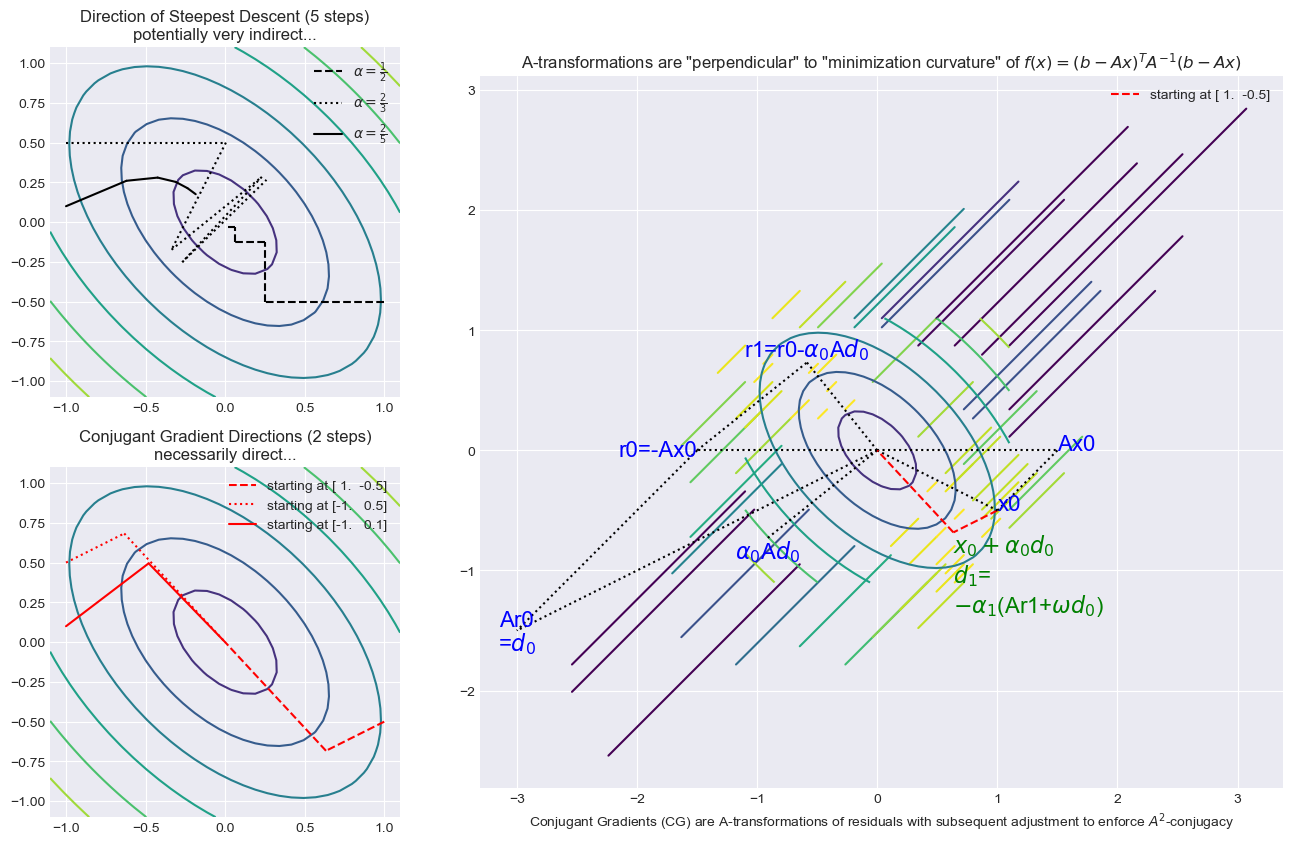

In [25]:
def plot_2D_gradient_descent(current, gradient, stepsize, 
                             ax, label=None, style='k'):

  """
    plots on `ax` with `label` and `style`
    a line from the 2D point `current` 
    in the negative 2D direction of `gradient` 
    with length of `stepsize` times `gradient`
  """

  next = current - stepsize*gradient

  ax.plot([current[0],next[0]], [current[1],next[1]], style, label=label)
  return next
                   

def plot_2D_conjugant_gradient(
  A, current_proposal, residual, Ar, Ar_L2sq, conjugant_gradient, 
  ax, label=None, style='k', verbose=None):

  """
    plots on `ax` with `label` and `style`
    a line from the 2D point `current_proposal` 
    in the direction of the conjugate gradient 
    with length of `correct_stepsize` times the conjugate gradient
    
    A                  : system of linear equations Ax=b being solved for x
    current_proposal   : a current choice for x in Ax=b
    residual           : b - Ax where x is current_proposal
    Ar                 : Ar where r is residual
    Ar_L2sq            : squared L2 norm of Ar 
    conjugant_gradient : direction which was moved resulting in current_proposal
    verbose            : provides verbose explanatory illustrative plotting 

    returns: iterated_proposal, new_residual, new_Ar, new_Ar_L2sq, new_conjugant_gradient
  """

  # b = 0 # ignored for simplicity
  # A-transformations are "perpendicular" to "minimization curvature" of b-Ax
  # residual = 0 - A.dot(current)             # given as function argument
  # Ar = A.dot(residual)                      # given as function argument
  # Ar_L2sq = Ar.dot(Ar) # L2-norm squared    # given as function argument

  # A-transformations are "perpendicular" to "minimization curvature" of b-Ax
  # direction of change in the residual 
  Aconjugant_gradient = A.dot(conjugant_gradient) 
  Aconjugant_gradient_L2sq = Aconjugant_gradient.dot(Aconjugant_gradient)
  # update requires a specific stepsize in the conjugant_gradient direction
  correct_stepsize_V1 = Ar_L2sq/Aconjugant_gradient_L2sq

  # x_new = x_old + delta
  iterated_proposal = current_proposal + correct_stepsize_V1*conjugant_gradient

  ax.plot([current_proposal[0],iterated_proposal[0]], 
          [current_proposal[1],iterated_proposal[1]], style, label=label)

  old_residual = residual[:] 
  # new_residual = b - A.dot(iterated_proposal) 
  # new_residual = b - A.dot(current_proposal + correct_stepsize*conjugant_gradient) 
  # new_residual = b - A.dot(current_proposal) - A.dot(correct_stepsize*conjugant_gradient) 
  # new_residual = old_residual - correct_stepsize*Aconjugant_gradient
  # new_residual = b - A(x_old+epsilon*delta) = (b - A(x_old)) - epsilon*A(delta)
  new_residual = residual - correct_stepsize_V1*Aconjugant_gradient
  new_Ar = A.dot(new_residual)
  new_Ar_L2sq = new_Ar.dot(new_Ar)
  # update requires a specific stepsize in the conjugant_gradient direction
  correct_stepsize_V2 = new_Ar_L2sq/Ar_L2sq

  # adjust Ar so result is A-conjugate with previous conjugant_gradients  
  old_conjugant_gradient = conjugant_gradient
  conjugant_gradient = new_Ar + correct_stepsize_V2*conjugant_gradient

  # will be returned from function below after verbose plotting just next
  output = \
  iterated_proposal, new_residual, new_Ar, new_Ar_L2sq, conjugant_gradient

  if not verbose is None:

    ax.plot([0, current_proposal[0]], [0, current_proposal[1]], 'k:')
    ax.text(current_proposal[0], current_proposal[1], 
            'x'+verbose, fontsize=16, c='blue')

    ax.plot([0, A.dot(current_proposal)[0]], [0, A.dot(current_proposal)[1]], 'k:')
    ax.text(A.dot(current_proposal)[0], A.dot(current_proposal)[1], 
            'Ax'+verbose, fontsize=16, c='blue')

    ax.plot([current_proposal[0], A.dot(current_proposal)[0]], 
            [current_proposal[1], A.dot(current_proposal)[1]], 'k:')

    ax.plot([0,old_residual[0]], [0,old_residual[1]], 'k:')
    ax.text(old_residual[0], old_residual[1], 'r'+verbose+'=-Ax'+verbose, 
            fontsize=16, c='blue',
            horizontalalignment='right', verticalalignment='center')
    
    ax.plot([old_residual[0], A.dot(old_residual)[0]], 
            [old_residual[1], A.dot(old_residual)[1]], 'k:')
    ax.text(A.dot(old_residual)[0], A.dot(old_residual)[1], 
            'Ar'+verbose, fontsize=16, c='blue', verticalalignment='bottom', 
            horizontalalignment='center')
    ax.plot([0,old_conjugant_gradient[0]], [0,old_conjugant_gradient[1]], 'k:')
    ax.text(old_conjugant_gradient[0], old_conjugant_gradient[1], 
            '=$d_0$', fontsize=16, c='blue', verticalalignment='top', 
             horizontalalignment='center')

    ax.plot([0, correct_stepsize_V1*Aconjugant_gradient[0]], 
            [0, correct_stepsize_V1*Aconjugant_gradient[1]], 'k:')
    ax.text(correct_stepsize_V1*Aconjugant_gradient[0], 
            correct_stepsize_V1*Aconjugant_gradient[1], 
            '$\\alpha_0$A$d_0$', fontsize=16, c='blue', 
            verticalalignment='top', horizontalalignment='center')
    ax.plot([old_residual[0], 
             old_residual[0] - correct_stepsize_V1*Aconjugant_gradient[0]], 
            [old_residual[1], 
             old_residual[1] - correct_stepsize_V1*Aconjugant_gradient[1]], 'k:')
    ax.plot([0, old_residual[0] - correct_stepsize_V1*Aconjugant_gradient[0]], 
            [0, old_residual[1] - correct_stepsize_V1*Aconjugant_gradient[1]], 'k:')
    ax.text(old_residual[0] - correct_stepsize_V1*Aconjugant_gradient[0], 
            old_residual[1] - correct_stepsize_V1*Aconjugant_gradient[1], 
            'r'+str(int(verbose)+1)+'=r'+verbose+'-$\\alpha_0$A$d_0$', 
            fontsize=16, c='blue', 
            horizontalalignment='center', verticalalignment='bottom')

    Aconjugant_gradient = A.dot(conjugant_gradient)
    ACG_L2sq = Aconjugant_gradient.dot(Aconjugant_gradient)
    tmp = -new_Ar_L2sq/ACG_L2sq*(conjugant_gradient)
    ax.text(tmp[0], tmp[1], 
            '$x_0+\\alpha_0 d_0$\n$d_1$=\n$-\\alpha_1$(Ar'+str(int(verbose)+1)+'+$\\omega d_0$)', 
            fontsize=16, c='green', 
            horizontalalignment='left', verticalalignment='top')
    
  return output


# https://matplotlib.org/stable/gallery/images_contours_and_fields/contour_demo.html
n = 30
x1,x2 = np.meshgrid(np.linspace(-1.1,1.1,n),np.linspace(-1.1,1.1,n))
X = np.concatenate([x1.reshape(n**2, 1), x2.reshape(n**2, 1)], axis=1)
# for the min_x ||(Ax-b)^TA(Ax-b)||_2 problem (with b=0) and
A = np.diag([1,1])+1.
#y = (X.dot(A).dot(np.linalg.inv(A))*X.dot(A)).sum(axis=1).reshape(n,n)
y = (X.dot(A)*X).sum(axis=1).reshape(n,n) # same as above

plt.style.use('seaborn-darkgrid') # whitegrid
plt.set_cmap("viridis")
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(231)
# https://stackoverflow.com/questions/7965743/how-can-i-set-the-aspect-ratio-in-matplotlib
ax.set_aspect('equal')
ax.contour(x1, x2, np.sqrt(y))


x0s = np.array([1, -0.5]), np.array([-1, 0.5]), np.array([-1, .1])
epsilons = 0.5, 0.67, 0.2
labels = "$\\alpha=\\frac{1}{2}$", "$\\alpha=\\frac{2}{3}$", "$\\alpha=\\frac{2}{5}$"
styles = 'k--', 'k:', 'k'
for x0, epsilon, label, style in zip(x0s, epsilons, labels, styles):
  for label in [label]+4*[None]:
    x0 = plot_2D_gradient_descent(current=x0, gradient=A.dot(x0), stepsize=epsilon, 
                                  ax=ax, label=label, style=style)

ax.legend()
ax.set_title('Direction of Steepest Descent (5 steps)\npotentially very indirect...')


ax = fig.add_subplot(234)
ax.contour(x1, x2, np.sqrt(y))
ax.set_aspect('equal')


# initializing conjugant_gradient=0 and CG_L2sq=1 to disappear first time 
initial_proposal = np.array([1, -0.5])

x0s = np.array([1, -0.5]), np.array([-1, 0.5]), np.array([-1.0, 0.1])
styles = 'r--', 'r:', 'r'
for initial_proposal, style in zip(x0s, styles):
  r = -A.dot(initial_proposal)
  Ar = A.dot(r)
  Ar_L2sq = Ar.dot(Ar)
  updated_proposal, r, Ar, Ar_L2sq, conjugant_gradient= \
  plot_2D_conjugant_gradient(A, initial_proposal, r, Ar, Ar_L2sq, 
                             conjugant_gradient=Ar, ax=ax, style=style,
                             label="starting at "+str(initial_proposal))
  plot_2D_conjugant_gradient(A, updated_proposal, r, Ar, Ar_L2sq, 
                             conjugant_gradient, ax=ax, style=style)

ax.legend()
ax.set_title('Conjugant Gradient Directions (2 steps)\nnecessarily direct...')


ax = fig.add_subplot(2,3,(2,6))
cmap = matplotlib.cm.get_cmap('viridis')
ax.set_aspect('equal')
for a,b in zip(X,X.dot(A)): 
  if stats.bernoulli(.1*np.abs(a[0]-a[1])).rvs(1)[0]:
    plt.plot([a[0],b[0]],[a[1],b[1]], color=cmap(1-(a-b).dot(a-b)/3))
ax.contour(x1, x2, np.sqrt(y))

initial_proposal = np.array([1, -0.5])
style = 'r--'
r = -A.dot(initial_proposal)
Ar = A.dot(r)
Ar_L2sq = Ar.dot(Ar)
updated_proposal, r, Ar, Ar_L2sq, conjugant_gradient = \
plot_2D_conjugant_gradient(A, initial_proposal, r, Ar, Ar_L2sq, 
                           conjugant_gradient=Ar, ax=ax, style=style,
                           label="starting at "+str(initial_proposal), 
                           verbose="0")#"0"
plot_2D_conjugant_gradient(A, updated_proposal, r, Ar, Ar_L2sq,  
                           conjugant_gradient, ax=ax, style=style,
                           verbose=None)

ax.legend()
ax.set_title('A-transformations are "perpendicular" to "minimization curvature" of $f(x) = (b-Ax)^TA^{-1}(b-Ax)$')
_ = ax.set_xlabel('Conjugant Gradients (CG) are A-transformations of residuals with subsequent adjustment to enforce $A^2$-conjugacy')

In [ ]:
import scipy
from scipy import stats
import matplotlib
